In [34]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [35]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [36]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [37]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [38]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [39]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [40]:
# Save references to each table (create a variable)
M = base.classes.measurement
S = base.classes.station

In [41]:
# Create our session (link) from Python to the DB
Session = Session(engine)

In [49]:
#How to find the most recent date 
# #Session.query(M.date).all()[-1]
Session.query(M.date).order_by(M.date.desc()).first()

('2017-08-23',)

# Exploratory Precipitation Analysis

In [51]:
# Find the most recent date in the data set.
dateStr = Session.query(M.date).all()[-1][0]

In [52]:
lastDate = dt.datetime.strptime(dateStr, '%Y-%m-%d').date()
#previous year 
prevYear= lastDate-dt.timedelta(365)
prevYear

datetime.date(2016, 8, 23)

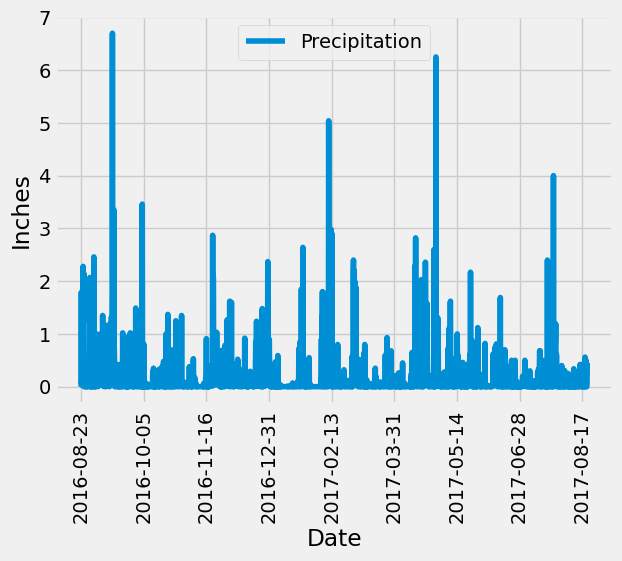

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
Session.query(M.date).order_by(M.date.desc()).first()
# Calculate the date one year from the last date in data set.
lastDate = dt.datetime.strptime(dateStr, '%Y-%m-%d').date()
prevYear = lastDate-dt.timedelta(365)
# Perform a query to retrieve the data and precipitation scores
results = Session.query(M.date, M.prcp).filter(M.date>=prevYear).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values('Date').set_index('Date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90,ylabel='Inches');

In [71]:
# Use Pandas to calculate the summary statistics for the precipitation data
# 'df' = Pandas DataFrame containing the precipitation data

# Calculate summary statistics
summary_stats = df['Precipitation'].describe()

# Print the results
print("Precipitation Summary Statistics:")
print(summary_stats.to_markdown(numalign="left", stralign="left"))

Precipitation Summary Statistics:
|       | Precipitation   |
|:------|:----------------|
| count | 2021            |
| mean  | 0.177279        |
| std   | 0.46119         |
| min   | 0               |
| 25%   | 0               |
| 50%   | 0.02            |
| 75%   | 0.13            |
| max   | 6.7             |


# Exploratory Station Analysis

In [81]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
station_count = Session.query(func.count(Base.classes.station.station)).scalar()

# List the stations and their counts in descending order.


NameError: name 'Base' is not defined

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

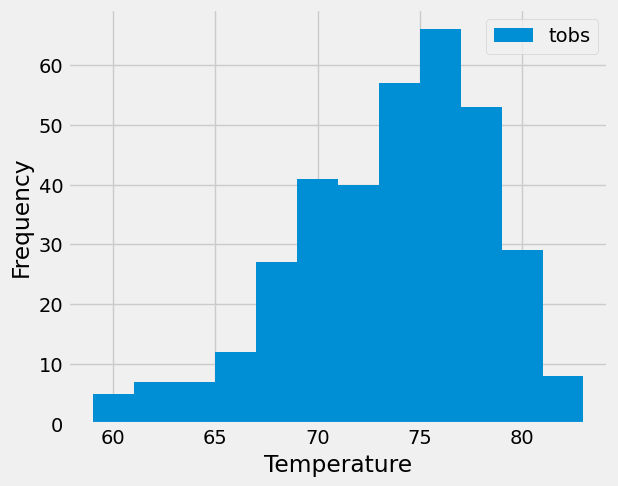

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()